<a href="https://colab.research.google.com/github/Shiwei-Chen/ANF/blob/main/anf_Multilinear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
dataurl = 'https://raw.githubusercontent.com/Shiwei-Chen/ANF/main/ANF.csv'
df = pd.read_csv(dataurl)
df.head(10)

,Date,Promo Power,Cost of BZ,Cost of Display,Cost of PLA,Cost of Search,TOT COST,COST exc BZ,GMV of BZ,GMV of Display,GMV of PLA,GMV of Search,TOT GMV,GMV exc BZ,Cost of BZ EC,Cost of Display EC,Cost of Display NC,Cost of PLA EC,Cost of PLA NC,Cost of Search EC,Cost of Search NC,COST ON EC exc BZ,COST on NC exc BZ
0,4/1/2021,0,3096,1121,8668,9471,22356,19260,102721,15291,89073,79571,286656,183935,3096,17,1104,882,7786,1482,7989,2380,16879
1,4/2/2021,2,2971,1405,11039,10327,25743,22771,132233,11886,132296,93781,370196,237963,2971,66,1339,1271,9768,1032,9295,2369,20402
2,4/3/2021,2,3291,1062,8031,8760,21144,17853,190559,20536,135666,106338,453100,262541,3291,36,1026,992,7039,1064,7696,2092,15761
3,4/4/2021,2,3316,1107,7521,8906,20850,17534,160113,11709,97342,86691,355854,195741,3316,60,1047,1063,6458,683,8223,1806,15728
4,4/5/2021,2,3363,1015,7113,8187,19677,16315,166378,22543,109577,86761,385258,218880,3363,24,991,1096,6016,746,7441,1866,14448
5,4/6/2021,0,3085,812,6780,6643,17321,14236,113407,9008,83085,76777,282278,168871,3085,13,799,939,5842,590,6053,1542,12694
6,4/7/2021,2,2977,803,6912,6772,17464,14487,126447,8302,75284,75570,285604,159157,2977,8,795,820,6092,431,6341,1259,13228
7,4/8/2021,2,2903,328,4445,5252,12927,10024,99311,3101,57760,53071,213242,113932,2903,5,322,518,3927,469,4783,993,9032
8,4/9/2021,2,2841,325,3538,4503,11207,8365,108169,4108,33095,53338,198710,90541,2841,4,321,362,3176,527,3976,893,7472
9,4/10/2021,2,3024,481,4292,5899,13697,10673,121871,4445,57041,60447,243805,121933,3024,4,477,385,3907,598,5302,987,9686


In [5]:
df.dtypes

Date                  object
Promo Power            int64
Cost of BZ             int64
Cost of Display        int64
Cost of PLA            int64
Cost of Search         int64
TOT COST               int64
COST exc BZ            int64
GMV of BZ              int64
GMV of Display         int64
GMV of PLA             int64
GMV of Search          int64
TOT GMV                int64
GMV exc BZ             int64
Cost of BZ EC          int64
Cost of Display EC     int64
Cost of Display NC     int64
Cost of PLA EC         int64
Cost of PLA NC         int64
Cost of Search EC      int64
Cost of Search NC      int64
COST ON EC exc BZ      int64
COST on NC exc BZ      int64
dtype: object

In [6]:
df.isnull().sum().any()

False

In [7]:
df1 = df.drop(['Cost of BZ','Cost of BZ EC','Cost of Display EC','Cost of PLA EC','Cost of Search EC','COST ON EC exc BZ'], axis = 1)
df1.head(10)

,Date,Promo Power,Cost of Display,Cost of PLA,Cost of Search,TOT COST,COST exc BZ,GMV of BZ,GMV of Display,GMV of PLA,GMV of Search,TOT GMV,GMV exc BZ,Cost of Display NC,Cost of PLA NC,Cost of Search NC,COST on NC exc BZ
0,4/1/2021,0,1121,8668,9471,22356,19260,102721,15291,89073,79571,286656,183935,1104,7786,7989,16879
1,4/2/2021,2,1405,11039,10327,25743,22771,132233,11886,132296,93781,370196,237963,1339,9768,9295,20402
2,4/3/2021,2,1062,8031,8760,21144,17853,190559,20536,135666,106338,453100,262541,1026,7039,7696,15761
3,4/4/2021,2,1107,7521,8906,20850,17534,160113,11709,97342,86691,355854,195741,1047,6458,8223,15728
4,4/5/2021,2,1015,7113,8187,19677,16315,166378,22543,109577,86761,385258,218880,991,6016,7441,14448
5,4/6/2021,0,812,6780,6643,17321,14236,113407,9008,83085,76777,282278,168871,799,5842,6053,12694
6,4/7/2021,2,803,6912,6772,17464,14487,126447,8302,75284,75570,285604,159157,795,6092,6341,13228
7,4/8/2021,2,328,4445,5252,12927,10024,99311,3101,57760,53071,213242,113932,322,3927,4783,9032
8,4/9/2021,2,325,3538,4503,11207,8365,108169,4108,33095,53338,198710,90541,321,3176,3976,7472
9,4/10/2021,2,481,4292,5899,13697,10673,121871,4445,57041,60447,243805,121933,477,3907,5302,9686


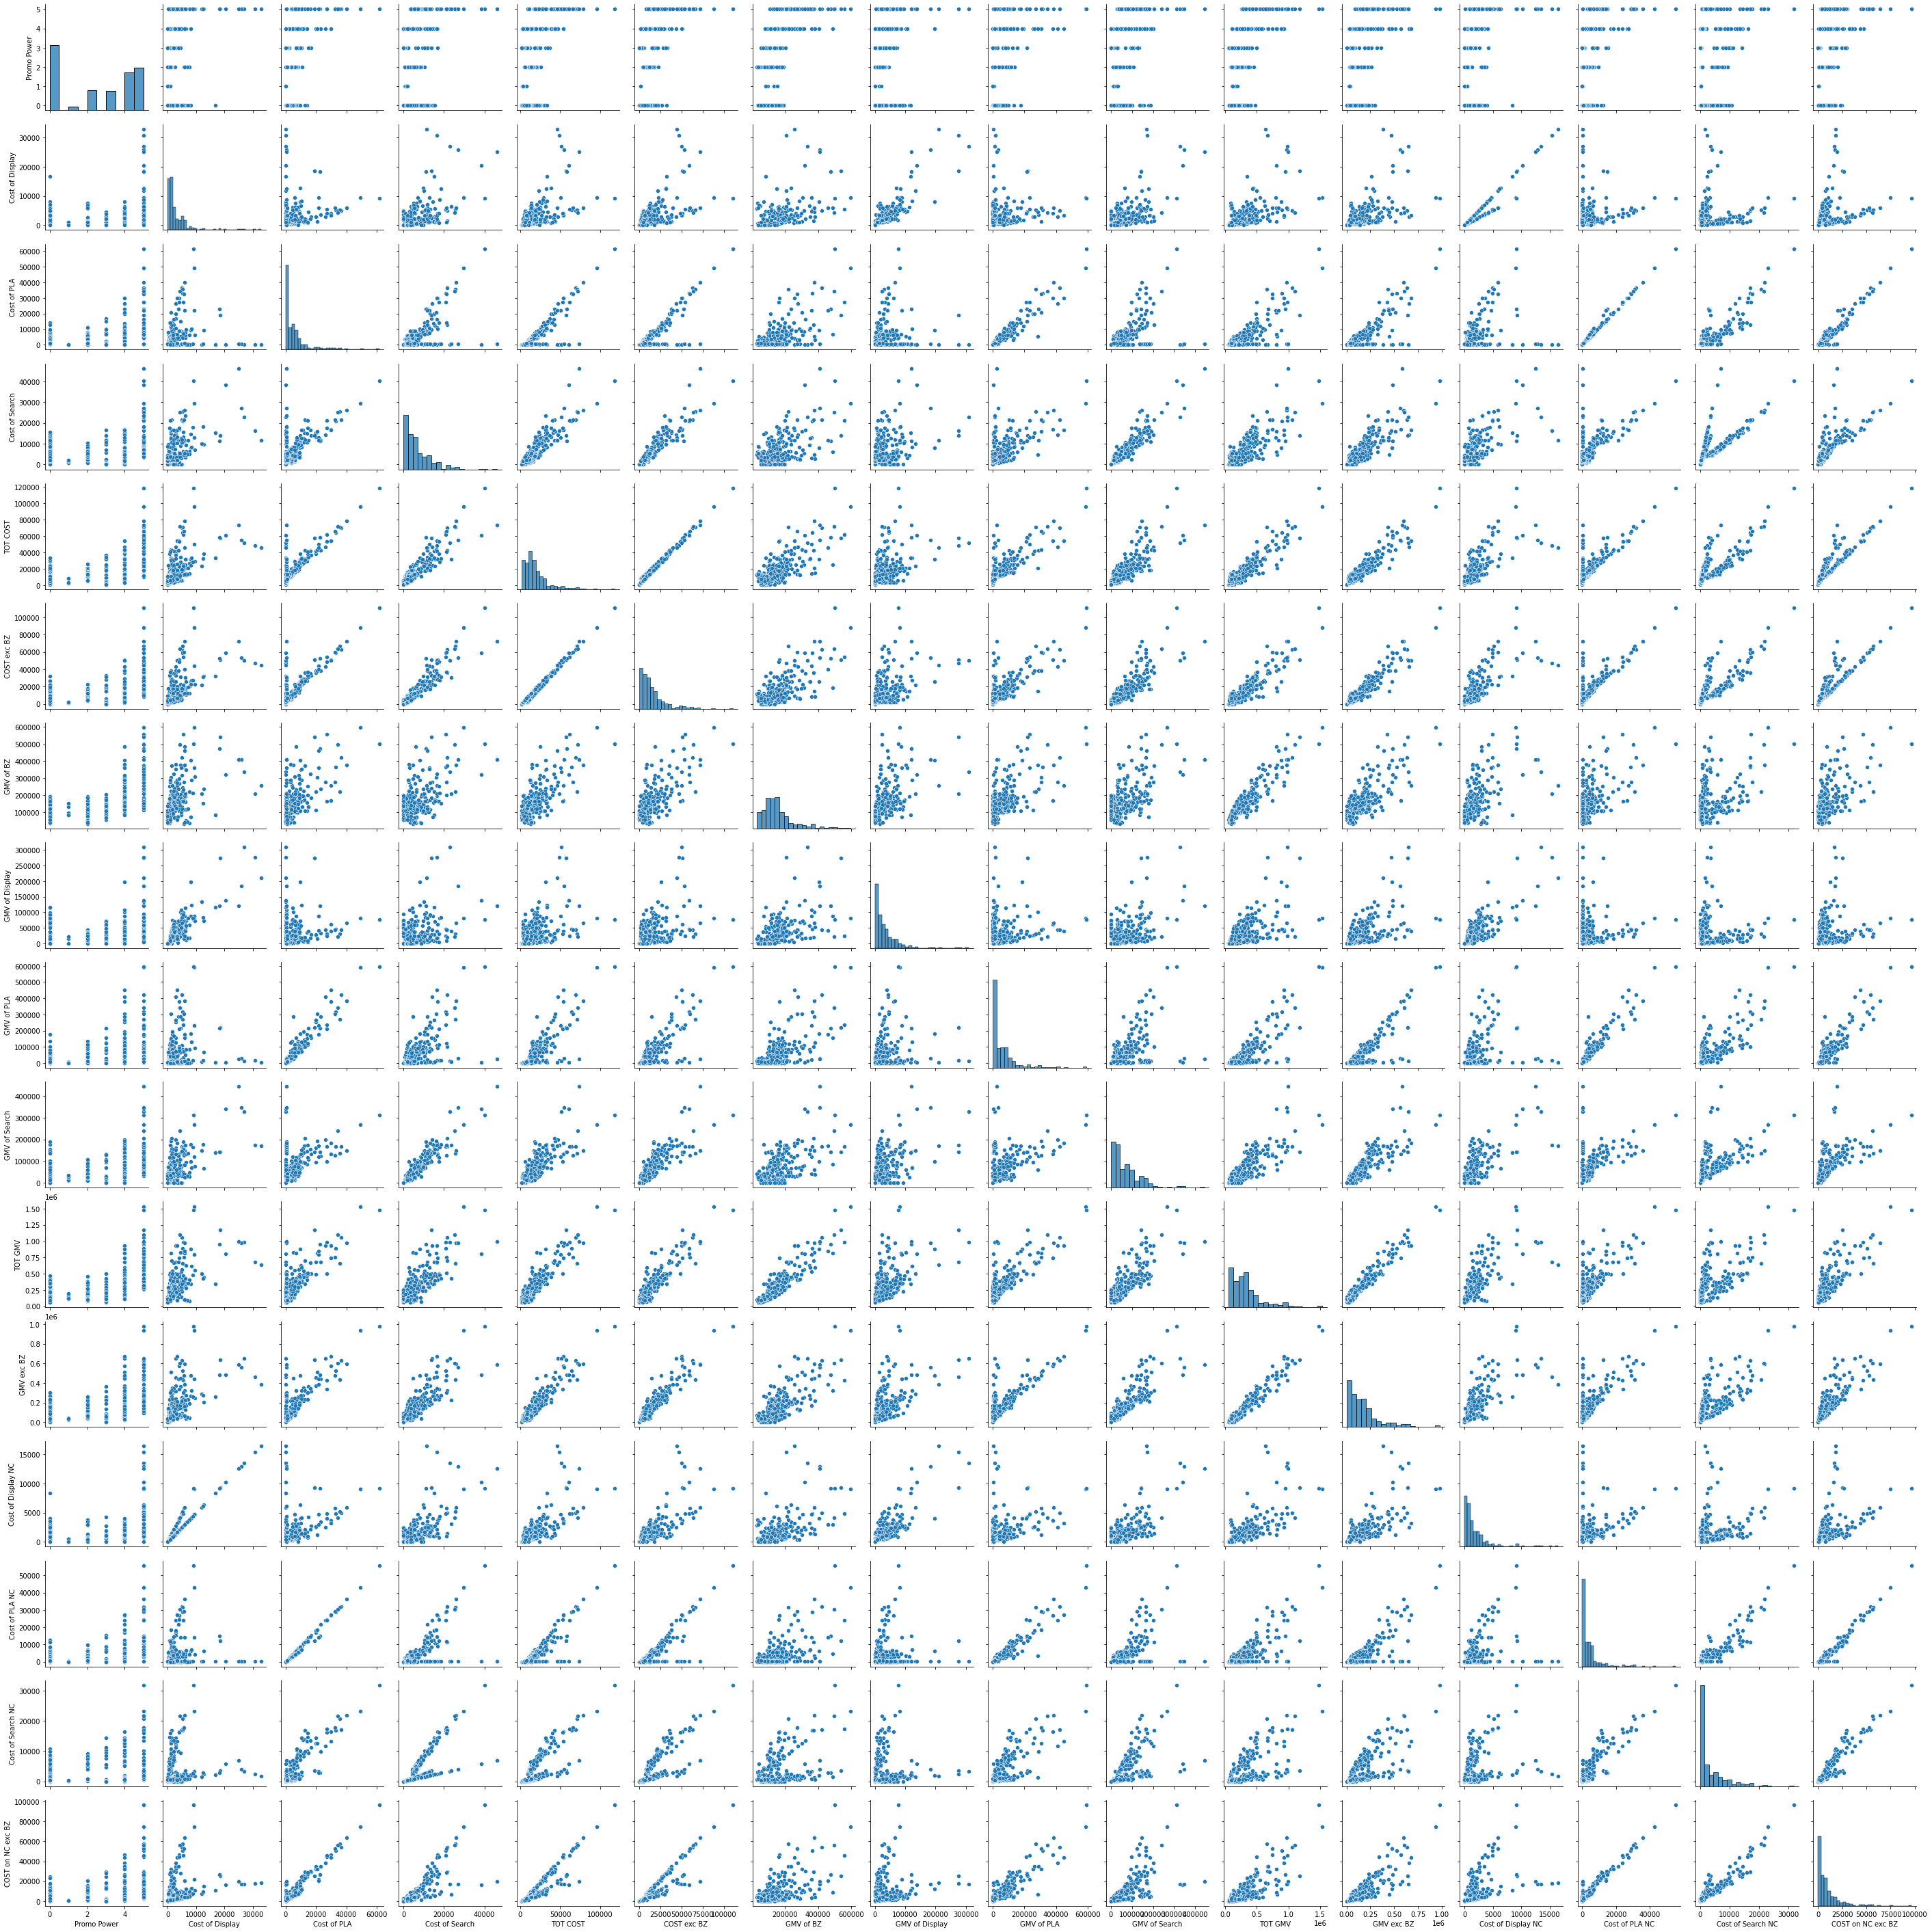

In [8]:
b = sns.pairplot(df1)

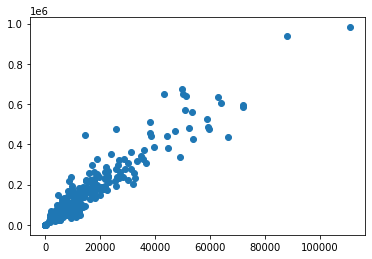

In [9]:
plt.plot(df['COST exc BZ'],df['GMV exc BZ'],"o") #in 1*10^6 (1e6)

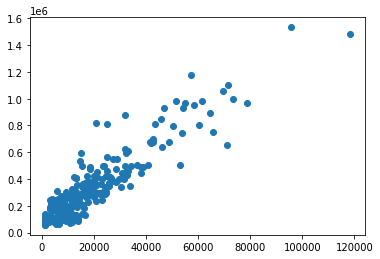

In [10]:
plt.plot(df['TOT COST'],df['TOT GMV'],"o")

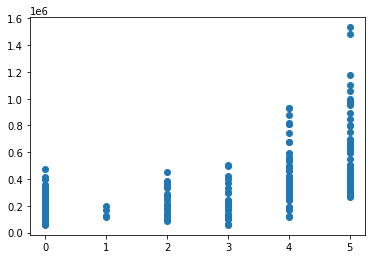

In [11]:
plt.plot(df['Promo Power'],df['TOT GMV'],"o")

In [12]:
from sklearn import linear_model
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
X = df[['Promo Power','COST exc BZ','COST on NC exc BZ']]
Y = df['TOT GMV']
X.head(10)

,Promo Power,COST exc BZ,COST on NC exc BZ
0,0,19260,16879
1,2,22771,20402
2,2,17853,15761
3,2,17534,15728
4,2,16315,14448
5,0,14236,12694
6,2,14487,13228
7,2,10024,9032
8,2,8365,7472
9,2,10673,9686


In [14]:
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                TOT GMV   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     461.9
Date:                Thu, 05 Aug 2021   Prob (F-statistic):          9.10e-106
Time:                        01:30:00   Log-Likelihood:                -3528.1
No. Observations:                 273   AIC:                             7064.
Df Residuals:                     269   BIC:                             7079.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.213e+04   9942.30

As shown in the result, 'COST on NC exc BZ' P-value is higher than 0.05, which means that this attribution is not significant enough. Therefore we should exclude this attribution. 

In [15]:
X1 = df[['Promo Power','COST exc BZ']]
Y1 = df['TOT GMV']

X1 = sm.add_constant(X1) # adding a constant
 
model = sm.OLS(Y1, X1).fit()
predictions = model.predict(X1) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                TOT GMV   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     690.7
Date:                Thu, 05 Aug 2021   Prob (F-statistic):          6.70e-107
Time:                        01:30:01   Log-Likelihood:                -3528.9
No. Observations:                 273   AIC:                             7064.
Df Residuals:                     270   BIC:                             7075.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.337e+04   9903.362      8.418      

In [16]:
regr = linear_model.LinearRegression()
regr.fit(X1, Y1)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 83366.47923171418
Coefficients: 
 [0.00000000e+00 2.30071978e+04 1.22105895e+01]


IN CONCLUSION, THE FORMULA RESULT FOR THIS MULTILINEAR REGRESSION MODEL IS: 

**TOTAL GMV = 2301 * PROMO POWER + 12.21 * COST exc Brand Zone + 83366.48** 

WITH AN ADJUSTED R-SQUARE AT 0.835, WHICH MEANS 83.5% OF POINTS CAN BE EXPLAINED BY THIS MODEL.